## Preprocess data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [0]:
#Пожалуйста, выполните код ниже, дабы скачать в коллаб нужные файлы.
#Если вы не работаете в коллабе, выполнять код не нужно


In [11]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y4xJcBaw5ub4cfCtYIdLbgPvFGvHyTsD' -O tokenizer_custom_bert.py
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1c7X35380Ny6r9ZUaKzoBL8cfVYSw1sq5' -O file_utils_custom.py
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hD1zTPdY441xiXeTQDYeVR-7P8laLgsE' -O review_books.tsv

--2019-10-17 21:52:17--  https://docs.google.com/uc?export=download&id=1Y4xJcBaw5ub4cfCtYIdLbgPvFGvHyTsD
Resolving docs.google.com (docs.google.com)... 108.177.120.102, 108.177.120.113, 108.177.120.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.120.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-6s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2j7du5jsij13rh3ttovbreltt6mg18g4/1571342400000/01961971800886548445/*/1Y4xJcBaw5ub4cfCtYIdLbgPvFGvHyTsD?e=download [following]
--2019-10-17 21:52:17--  https://doc-00-6s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2j7du5jsij13rh3ttovbreltt6mg18g4/1571342400000/01961971800886548445/*/1Y4xJcBaw5ub4cfCtYIdLbgPvFGvHyTsD?e=download
Resolving doc-00-6s-docs.googleusercontent.com (doc-00-6s-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to doc-00-6s-docs.googleusercontent.com (doc-00

In [12]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ePm7_OV1TBNPgPBDmSW14iFBPZaWAShV' -O uncased_L-12_H-768_A-12.zip

--2019-10-17 21:54:02--  https://docs.google.com/uc?export=download&id=1ePm7_OV1TBNPgPBDmSW14iFBPZaWAShV
Resolving docs.google.com (docs.google.com)... 108.177.120.102, 108.177.120.113, 108.177.120.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.120.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_     [ <=>                ]   3.19K  --.-KB/s    in 0s      

2019-10-17 21:54:02 (37.1 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [3263]



In [0]:
import pandas as pd
import numpy as np
df = pd.read_csv('review_books.tsv', sep='\t') 

In [0]:
pos = df[df['score'] == 1]
neg = df[df['score'] == 0]

In [15]:
print (len(pos), len(neg), len(df))

78994 21008 100002


In [0]:
pos = pos[:21000]

In [0]:
pos_train = pos[:20000].dropna()
pos_test = pos[21000:].dropna()
neg_train = neg[:20000].dropna()
neg_test = neg[21000:].dropna()

train = pd.concat([pos_train, neg_train])
train = train.reindex(np.random.permutation(train.index))
test = pd.concat([pos_test, neg_test])
test = test.reindex(np.random.permutation(test.index))

In [18]:
train.head()

,Unnamed: 0,reviewText,score
36800,0,I was a bit disappointed with this book and ha...,0
7869,0,This is a book about lonely planet travellers ...,1
66976,0,"If your lover insists you read this, run as fa...",0
37710,0,"I loved the first two books, this one was disa...",0
89990,0,"I consider myself a ""wordie"" - love to hear ab...",0


In [0]:
train_text = train['reviewText'].values
train_label = train['score'].values

In [20]:
train_text[3:5]

array(["I loved the first two books, this one was disappointing.  Definitely not the ending that you expect. This one doesn't hold you in utter suspense either.  You kind of see what's coming and it loses the excitement that the first two books had.  Not a horrible read, but not in comparison to divergent and insurgent.  :(",
       'I consider myself a "wordie" - love to hear about interesting word origins and the like - and so was very happy to see this book at the used book store.  After reading it, however, it is going back to the used book store.  Parts of it were okay, but nothing was especially earth-shattering about it.  And, most unfortunately, so many of the entries were expressions that only my grandfather remembers anymore that it was more or less irrelevant to me.  I suppose there\'s a quirk factor to the book, and perhaps it would be useful for someone wanting to write a book set in the 40\'s or 50\'s, but there are many better books to buy if words are your thing.'],
   

In [22]:
!pip3 install pytorch-pretrained-bert

     |████████████████████████████████| 133kB 3.5MB/s 
     |████████████████████████████████| 645kB 11.4MB/s 


In [0]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

In [0]:
tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased')

In [28]:
tokenizer1.vocab['mississippi']

5900

In [29]:
text = "After stealing embeddings from the bank's accounts, the bank robber was seen driving on the Mississippi river bank in mini-van."
text = '[CLS]' + text + '[SEP]'
tokenized_text = tokenizer1.tokenize(text)
print (tokenized_text)

['[', 'cl', '##s', ']', 'after', 'stealing', 'em', '##bed', '##ding', '##s', 'from', 'the', 'bank', "'", 's', 'accounts', ',', 'the', 'bank', 'robber', 'was', 'seen', 'driving', 'on', 'the', 'mississippi', 'river', 'bank', 'in', 'mini', '-', 'van', '.', '[', 'sep', ']']


In [0]:
! wget https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt

--2019-10-17 15:35:09--  https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.17.203
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.17.203|:443... ^C


In [0]:
!pwd

/home/vika/embedding_vs_bert


In [35]:
%load_ext autoreload
%autoreload 2
import tokenizer_custom_bert

text = "After stealing embeddings from the bank's accounts, the bank robber was seen driving on the Mississippi river bank in mini-van."
text = '[CLS]' + text + '[SEP]'
tokenizer = tokenizer_custom_bert.BertTokenizer.from_pretrained("https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt")
tokenized_text = tokenizer.tokenize(text)
print (tokenized_text)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


10/17/2019 22:12:40 - INFO - file_utils_custom -   https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt not found in cache, downloading to /tmp/tmpkpvrg3b1
100%|██████████| 231508/231508 [00:00<00:00, 2620766.44B/s]
10/17/2019 22:12:40 - INFO - file_utils_custom -   copying /tmp/tmpkpvrg3b1 to cache at /home/vika/targer/pretrained/uncased_L-12_H-768_A-12/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
10/17/2019 22:12:41 - INFO - file_utils_custom -   creating metadata file for /home/vika/targer/pretrained/uncased_L-12_H-768_A-12/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
10/17/2019 22:12:41 - INFO - file_utils_custom -   removing temp file /tmp/tmpkpvrg3b1
10/17/2019 22:12:41 - INFO - tokenizer_custom_bert -   loading vocabulary file %s from cache at %s


resolved voc file /home/vika/targer/pretrained/uncased_L-12_H-768_A-12/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084



10/17/2019 22:12:41 - WARNING - tensorflow -   From /content/tokenizer_custom_bert.py:187: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



['[UNK]', 'stealing', 'em', '##bed', '##ding', '##s', 'from', 'the', 'bank', "##'", '##s', 'accounts', '##,', 'the', 'bank', 'robber', 'was', 'seen', 'driving', 'on', 'the', '[UNK]', 'river', 'bank', 'in', '[UNK]']


In [36]:
tokenizer.vocab['[UNK]']

100

In [38]:
list(tokenizer.vocab.keys())[500:520]

['[unused495]',
 '[unused496]',
 '[unused497]',
 '[unused498]',
 '[unused499]',
 '[unused500]',
 '[unused501]',
 '[unused502]',
 '[unused503]',
 '[unused504]',
 '[unused505]',
 '[unused506]',
 '[unused507]',
 '[unused508]',
 '[unused509]',
 '[unused510]',
 '[unused511]',
 '[unused512]',
 '[unused513]',
 '[unused514]']

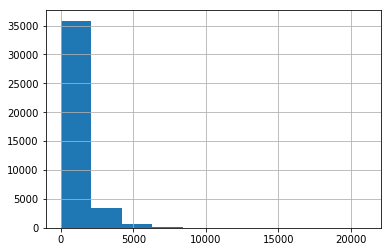

count    39996.000000
mean       928.194019
std       1091.717758
min          3.000000
25%        244.000000
50%        555.000000
75%       1192.000000
max      20986.000000
dtype: float64

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in train_text]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()


## Загрузка модели

Все претренированные модели лежат тут: https://github.com/google-research/bert

Мы будем работать с base, uncased - меленьким бертом, обученном на lower-case текстах.

Изначальная модель сохранена в tf, причем сохранена очень криво.

Для того, чтобы восстановить pytorch-модель, нужен config.json, *.ckpt файл. В скачанной папке нет *.ckpt в чистом виде, его надо создать через метаграф.

In [45]:
!wget 'https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip'

--2019-10-17 22:19:37--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip.1’

uncased_L-12_H-768_ 100%[===================>] 388.84M   110MB/s    in 3.5s    

2019-10-17 22:19:41 (110 MB/s) - ‘uncased_L-12_H-768_A-12.zip.1’ saved [407727028/407727028]



In [47]:
! unzip 'uncased_L-12_H-768_A-12.zip'

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [49]:
import tensorflow as tf
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./uncased_L-12_H-768_A-12/bert_model.ckpt.meta')
    saver.restore(sess, "./uncased_L-12_H-768_A-12/bert_model.ckpt")

INFO:tensorflow:Restoring parameters from ./uncased_L-12_H-768_A-12/bert_model.ckpt


10/17/2019 22:21:52 - INFO - tensorflow -   Restoring parameters from ./uncased_L-12_H-768_A-12/bert_model.ckpt


In [52]:
!pip3 install pytorch_transformers

     |████████████████████████████████| 184kB 3.4MB/s 
     |████████████████████████████████| 860kB 44.6MB/s 
     |████████████████████████████████| 1.0MB 43.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=f3400ad8123e307b74a3cb62a35f8bad659365cea3da3174574b0cd6048204bb
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built sacremoses


In [57]:
import torch

from pytorch_transformers.modeling_bert import BertConfig, BertForPreTraining, load_tf_weights_in_bert


tf_checkpoint_path="./uncased_L-12_H-768_A-12/bert_model.ckpt"
bert_config_file = "./uncased_L-12_H-768_A-12/bert_config.json"
pytorch_dump_path="./uncased_L-12_H-768_A-12/pytorch_model"

config = BertConfig.from_json_file(bert_config_file)
print("Building PyTorch model from configuration: {}".format(str(config)))
model = BertForPreTraining(config)

# Load weights from tf checkpoint
load_tf_weights_in_bert(model, config, tf_checkpoint_path)

# Save pytorch-model
print("Save PyTorch model to {}".format(pytorch_dump_path))
torch.save(model.state_dict(), pytorch_dump_path)

Building PyTorch model from configuration: {
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,
  "pruned_heads": {},
  "torchscript": false,
  "type_vocab_size": 2,
  "vocab_size": 30522
}



10/17/2019 22:25:22 - INFO - pytorch_transformers.modeling_bert -   Converting TensorFlow checkpoint from /content/uncased_L-12_H-768_A-12/bert_model.ckpt
10/17/2019 22:25:22 - INFO - pytorch_transformers.modeling_bert -   Loading TF weight bert/embeddings/LayerNorm/beta with shape [768]
10/17/2019 22:25:22 - INFO - pytorch_transformers.modeling_bert -   Loading TF weight bert/embeddings/LayerNorm/gamma with shape [768]
10/17/2019 22:25:22 - INFO - pytorch_transformers.modeling_bert -   Loading TF weight bert/embeddings/position_embeddings with shape [512, 768]
10/17/2019 22:25:22 - INFO - pytorch_transformers.modeling_bert -   Loading TF weight bert/embeddings/token_type_embeddings with shape [2, 768]
10/17/2019 22:25:22 - INFO - pytorch_transformers.modeling_bert -   Loading TF weight bert/embeddings/word_embeddings with shape [30522, 768]
10/17/2019 22:25:22 - INFO - pytorch_transformers.modeling_bert -   Loading TF weight bert/encoder/layer_0/attention/output/LayerNorm/beta with sh

Save PyTorch model to ./uncased_L-12_H-768_A-12/pytorch_model


In [60]:
path_to_pretrained = "./uncased_L-12_H-768_A-12"
bert_model = BertModel.from_pretrained(path_to_pretrained)

10/17/2019 22:26:03 - INFO - pytorch_pretrained_bert.modeling -   loading archive file ./uncased_L-12_H-768_A-12
10/17/2019 22:26:03 - INFO - pytorch_pretrained_bert.modeling -   Model config {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "type_vocab_size": 2,
  "vocab_size": 30522
}



Посмотрим на модель

In [78]:
bert_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

**!!! Важно. Bert учится и он огромен. Нужно заморозить все слои и если, разморзить несколько**

In [0]:
for param in bert_model.parameters():
    param.requires_grad = False
#for i in [0]: <--- сюда можете писать номера слоев, которые хотите разморозить
    #for param in self.emb.encoder.layer[i].parameters():
        #param.requires_grad = True

In [0]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
tokens_tensor = torch.tensor([indexed_tokens])
segment_ids = torch.tensor(np.zeros(tokens_tensor.shape)).to(torch.int64)


In [0]:
encoded_layers, _ = bert_model(tokens_tensor, segment_ids)

In [63]:
len(encoded_layers)

12

In [64]:
encoded_layers[2].shape

torch.Size([1, 26, 768])

In [65]:
tokens_tensor.shape

torch.Size([1, 26])

## NN

## Embedding layer

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def batch_to_ids(batch):
    batch = [text[:500] for text in batch]
    batch = ["[CLS] " + text + " [SEP]" for text in batch]
    tokenized_texts = [tokenizer.tokenize(sent) for sent in batch]
    MAX_LEN = np.max(np.array([len(seq) for seq in tokenized_texts]))
    MAX_LEN_IN_BATCH = np.max(np.array([len(seq) for seq in batch]))

    #print ("word_indexes, max len, max len in batch", MAX_LEN, MAX_LEN_IN_BATCH)
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts], maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    tokens_tensor = torch.tensor(input_ids)
    segments_tensor = torch.tensor(np.zeros(input_ids.shape)).to(torch.int64)

    return tokens_tensor, segments_tensor
    

In [67]:
batch_to_ids(["After stealing embeddings from the bank's accounts, the bank robber was seen driving on the Mississippi river bank in mini-van.", 'Just the place for a Snark! the Bellman cried,As he landed his crew with care'])

(tensor([[  101,   100, 11065,  7861,  8270,  4667,  2015,  2013,  1996,  2924,
          29618,  2015,  6115, 29623,  1996,  2924, 27307,  2001,  2464,  4439,
           2006,  1996,   100,  2314,  2924,  1999,  7163, 29624,  6212, 29625,
            102],
         [  101,   100,  1996,  2173,  2005,  1037,   100,  1996,   100,   100,
           2002,  5565,  2010,  3626,  2007,  2729,   102,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0]]),
 tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0]]))

In [0]:

import torch.nn as nn
import torch
class BertEmbedding(nn.Module):
    """Abstract base class for all type of layers."""
    def __init__(self, gpu):
        super(BertEmbedding, self).__init__()
        self.gpu = gpu
        
    def forward(self, word_sequences):
        tokens_tensor, segments_tensor = batch_to_ids(word_sequences)
        tokens_tensor = self.to_gpu(tokens_tensor)
        segments_tensor = self.to_gpu(segments_tensor)

               
        #print ("forward: token_tensor shape", tokens_tensor.shape)
        #print ("forward: number_word_in_seq shape", number_word_in_seq.shape)
        encoded_layers, _ = bert_model(tokens_tensor, segments_tensor)
        
        batch_embeddings = []
        for batch_i in range(tokens_tensor.shape[0]): #batch_size
            token_embeddings = []
            for token_i in range(tokens_tensor.shape[1]):  #number of token in batch element
                hidden_layers = [] 
                for layer_i in range(len(encoded_layers)):
                    vec = encoded_layers[layer_i][batch_i][token_i]
                    hidden_layers.append(vec)
                token_embeddings.append(hidden_layers)
            summed_last_4_layers = [torch.sum(torch.stack(layer)[-4:], 0) for layer in token_embeddings]
            summed_last_4_layers = torch.stack(summed_last_4_layers)
            batch_embeddings.append(summed_last_4_layers)
        
        answer = torch.stack(batch_embeddings)  
        return answer
        

    def to_gpu(self, tensor):
        if self.gpu > -1:
            return tensor.cuda(device=self.gpu)
        else:
            return tensor.cpu()


In [0]:
custom_embeddings = BertEmbedding(-1)
embeds_out =custom_embeddings(["After stealing embeddings from the bank's accounts, the bank robber was seen driving on the Mississippi river bank in mini-van.", 'Just the place for a Snark! the Bellman cried,As he landed his crew with care'])


In [83]:
embeds_out.shape

torch.Size([2, 31, 768])

In [84]:
hidden=None
lstm = nn.LSTM(input_size=768, hidden_size=256, num_layers=1, batch_first=True)
lstm_out, h = lstm(embeds_out, hidden)
print ('LSTM layer output shape', lstm_out.shape)
print ('LSTM layer output ', lstm_out)

LSTM layer output shape torch.Size([2, 31, 256])
LSTM layer output  tensor([[[ 0.6362,  0.0739,  0.4911,  ...,  0.0049,  0.0468, -0.3158],
         [ 0.7823,  0.0214,  0.0075,  ...,  0.0231,  0.0571, -0.1108],
         [ 0.2405, -0.1551, -0.2549,  ...,  0.0235,  0.0870, -0.3907],
         ...,
         [-0.2492,  0.5931,  0.1870,  ...,  0.0815,  0.0458, -0.0214],
         [ 0.4238,  0.5007,  0.1860,  ...,  0.2589, -0.0578, -0.4655],
         [ 0.1545,  0.2924, -0.0239,  ...,  0.5487, -0.1871, -0.1432]],

        [[ 0.4868, -0.0038,  0.6214,  ...,  0.0319,  0.0481, -0.7090],
         [ 0.6347, -0.0040,  0.8096,  ..., -0.1290,  0.0375, -0.1384],
         [ 0.1156, -0.0015,  0.2906,  ...,  0.0697, -0.0019, -0.5138],
         ...,
         [ 0.2627,  0.8592,  0.2469,  ...,  0.7008, -0.0580, -0.1797],
         [ 0.4174,  0.5454,  0.3148,  ...,  0.8545, -0.2055,  0.6822],
         [ 0.5388,  0.9116,  0.2724,  ...,  0.4064, -0.1580,  0.2077]]],
       grad_fn=<TransposeBackward0>)


In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
class LSTMClassifier(nn.Module):

    def __init__(self, hidden_dim, output_size, batch_size, cuda):

        super(LSTMClassifier, self).__init__()
        self.gpu = cuda
        self.embedding_dim = 768
        self.hidden_dim = hidden_dim

        self.embedding = BertEmbedding(self.gpu)
        self.lstm = nn.LSTM(input_size=self.embedding_dim, hidden_size=hidden_dim, bidirectional=True, num_layers=1, batch_first=True)
        self.hidden2label = nn.Linear(hidden_dim, output_size)
        self.hidden = self.init_hidden(batch_size)

    def init_hidden(self, batch_size):
        # first is the hidden h
        # second is the cell c
        if self.gpu > -1:
            return (Variable(torch.zeros(2, batch_size, self.hidden_dim).cuda()),
                    Variable(torch.zeros(2, batch_size, self.hidden_dim).cuda()))
        else:
            return (Variable(torch.zeros(2, batch_size, self.hidden_dim)),
                    Variable(torch.zeros(2, batch_size, self.hidden_dim)))

    def forward(self, sentence):
        x = self.embedding(sentence)
        lstm_out, (ht, ct) = self.lstm(x, self.hidden)
        y = self.hidden2label(ht[-1])
        log_probs = F.log_softmax(y, dim=1)
        return log_probs

In [0]:
#cuda0 = torch.device('cuda:0')

In [0]:
#model.to(device=cuda0)

In [0]:
output_size = 2
hidden_dim = 256
batch_size = 20

model = LSTMClassifier(hidden_dim, output_size, 20, cuda = -1)

In [0]:
pred = model(train_text[7:27])

In [88]:
pred.shape

torch.Size([20, 2])

In [89]:
embeds_out.shape

torch.Size([2, 31, 768])

In [90]:
embeds_out =custom_embeddings(train_text[4:7])
print ('Embedding layer output shape', embeds_out.shape)
print ('Embedding layer output ', embeds_out)

Embedding layer output shape torch.Size([3, 111, 768])
Embedding layer output  tensor([[[ 6.8031e-01, -1.1867e+00,  3.2894e-01,  ..., -4.9993e-01,
           5.2624e-01,  1.6079e+00],
         [ 5.7198e-02,  1.5116e+00,  3.2703e+00,  ...,  1.4151e+00,
           1.1917e+00,  1.8828e+00],
         [-1.0628e+00,  4.9244e+00,  1.5371e+00,  ..., -2.0137e+00,
           2.2094e+00,  8.5177e-01],
         ...,
         [-1.8299e-01, -3.9856e+00,  1.7900e-01,  ...,  1.3204e+00,
          -8.1669e-01,  2.8818e+00],
         [-3.6636e+00, -5.3252e+00, -5.1080e+00,  ..., -2.0597e+00,
           1.5085e-01,  1.3636e+00],
         [ 3.5583e-01,  5.7035e-01,  9.2911e-02,  ...,  1.8058e-03,
          -3.7883e-02, -3.7180e-01]],

        [[-6.5352e-01, -7.4600e-01,  6.9935e-01,  ..., -8.9726e-01,
          -5.0028e-01,  1.3217e+00],
         [-8.0479e-01,  2.5052e+00,  5.1342e+00,  ...,  1.7071e-01,
           1.3210e+00,  2.1838e-01],
         [ 3.1624e+00, -3.5378e+00,  1.6601e+00,  ...,  1.6580e-0

In [0]:
batch_size

20

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [0]:
it = 0
tot = 0
act = 0

PRINT_EVERY = 10

from tqdm import tqdm
loss_function = nn.NLLLoss()
for i in range(len(train_label)//batch_size):
    idx = [i*batch_size + k for k in range(batch_size)]
    batch = train_text[idx]
    y = train_label[idx]
    y = torch.from_numpy(np.array((y)))

    optimizer.zero_grad()
    pred = model(batch)
    print (pred.shape)
    l = loss_function(pred, y)
    l.backward()
    optimizer.step()

    it += 1
    tot += l.item()
    act += (pred.detach().numpy().argmax() == y)
    if it == PRINT_EVERY:
        print(tot/it, act/it)
        it = 0
        tot = 0
        act = 0

torch.Size([20, 2])
